In [34]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [15]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("Train length: %d"%len(X_train))
print("Test length: %d"%len(X_test))
print("Shape: {}".format(X_train[0].shape))

Train length: 60000
Test length: 10000
Shape: (28, 28)


In [16]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
print(X_train_flattened.shape)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,))
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8139 - accuracy: 0.1992
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3255 - accuracy: 0.1877
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2952 - accuracy: 0.1998
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2927 - accuracy: 0.1991
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2985 - accuracy: 0.1627


In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'relu')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.7711 - accuracy: 0.1023
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3100 - accuracy: 0.0992
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3088 - accuracy: 0.0988
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3088 - accuracy: 0.0988
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3088 - accuracy: 0.0988


In [23]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.9493 - accuracy: 0.8415
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1371 - accuracy: 0.8780
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.7017 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5475 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3402 - accuracy: 0.8864


In [24]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.0278 - accuracy: 0.8896


[6.027781009674072, 0.8895999789237976]

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.8361894e-23, 0.0000000e+00, 2.6171072e-06, 1.0000000e+00,
       2.1837182e-22, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [26]:
np.argmax(y_predicted[0])

3

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    1,    0,    0,    0,    0,    0,    0,    0],
       [  11, 1124,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 567,  292,  165,    3,    5,    0,    0,    0,    0,    0],
       [ 496,  344,  112,   58,    0,    0,    0,    0,    0,    0],
       [ 232,  118,  184,  194,  254,    0,    0,    0,    0,    0],
       [ 600,   53,   62,  103,   30,   44,    0,    0,    0,    0],
       [ 428,   89,  432,    2,    4,    2,    1,    0,    0,    0],
       [ 174,  129,  209,  483,   18,    9,    0,    6,    0,    0],
       [ 464,  352,  104,   33,   15,    5,    0,    0,    1,    0],
       [ 158,  127,  105,  541,   76,    0,    0,    2,    0,    0]])>

Text(69.0, 0.5, 'Truth')

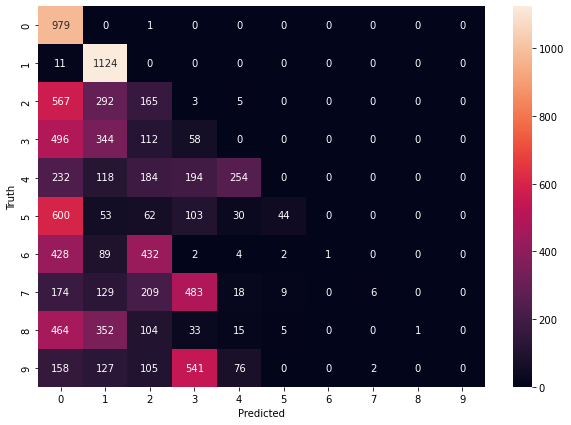

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
